# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
!pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Parameters
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
record = 1
units = "imperial"

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create a loop to find eah city
for city in cities:
    try:
        #query_url = url + "appid=" + weather_api_key + "units=" + units + "&q="
        query_url = f"{url}appid={weather_api_key}&units={units}&q="
        weather_response = requests.get(f'{query_url}{city}').json()
        city_name.append(weather_response["name"])
        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response["main"]["humidity"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        wind_speed.append(weather_response["wind"]["speed"])
        print(f'Processing Record {record} | {city}')
        record = record + 1
    except KeyError:
         print(f"City {city} not found. Skipping to next city.")
    pass
    time.sleep(1)
    
# Print complete logs
print("-----------------------------")
print("End of Data Retrieval     ")

Beginning Data Retrieval     
-----------------------------
City nizhneyansk not found. Skipping to next city.
Processing Record 1 | san carlos de bariloche
Processing Record 2 | ushuaia
Processing Record 3 | yellowknife
Processing Record 4 | tuy hoa
Processing Record 5 | westport
Processing Record 6 | gat
Processing Record 7 | vaini
Processing Record 8 | rikitea
Processing Record 9 | omsukchan
Processing Record 10 | adrar
Processing Record 11 | albany
Processing Record 12 | mataura
Processing Record 13 | vakhrushev
Processing Record 14 | kyra
Processing Record 15 | jamestown
Processing Record 16 | filingue
Processing Record 17 | alta floresta
Processing Record 18 | chokurdakh
Processing Record 19 | helong
Processing Record 20 | saint george
Processing Record 21 | rundu
Processing Record 22 | bredasdorp
Processing Record 23 | georgetown
Processing Record 24 | nome
Processing Record 25 | cidreira
Processing Record 26 | narrabri
Processing Record 27 | cape town
Processing Record 28 | ske

Processing Record 219 | am timan
Processing Record 220 | turbat
Processing Record 221 | turukhansk
Processing Record 222 | chone
Processing Record 223 | kavaratti
Processing Record 224 | yerofey pavlovich
Processing Record 225 | maceio
Processing Record 226 | paciran
Processing Record 227 | wau
Processing Record 228 | seydi
Processing Record 229 | namibe
City warqla not found. Skipping to next city.
Processing Record 230 | carutapera
Processing Record 231 | sohag
Processing Record 232 | omboue
Processing Record 233 | novikovo
Processing Record 234 | arlit
Processing Record 235 | port said
Processing Record 236 | vostok
Processing Record 237 | aleksandrovsk-sakhalinskiy
Processing Record 238 | manali
Processing Record 239 | soria
Processing Record 240 | ponta do sol
Processing Record 241 | ferkessedougou
Processing Record 242 | natal
Processing Record 243 | khakhea
Processing Record 244 | luderitz
Processing Record 245 | hambantota
Processing Record 246 | dongning
Processing Record 247 

Processing Record 435 | mogadishu
Processing Record 436 | vila franca do campo
Processing Record 437 | aykhal
Processing Record 438 | anori
Processing Record 439 | juneau
Processing Record 440 | brookhaven
Processing Record 441 | panlaitan
Processing Record 442 | golden
City mys shmidta not found. Skipping to next city.
Processing Record 443 | sotouboua
Processing Record 444 | bundaberg
Processing Record 445 | port augusta
Processing Record 446 | emba
Processing Record 447 | the valley
Processing Record 448 | cobija
City sentyabrskiy not found. Skipping to next city.
Processing Record 449 | piranshahr
Processing Record 450 | bilma
Processing Record 451 | umba
Processing Record 452 | prince rupert
Processing Record 453 | abha
Processing Record 454 | ginda
Processing Record 455 | kuala lipis
Processing Record 456 | aklavik
Processing Record 457 | souillac
Processing Record 458 | brae
Processing Record 459 | nouadhibou
Processing Record 460 | finote selam
Processing Record 461 | kosh-agac

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create the data frame
cities_pd = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date})

# Save Data to csv
cities_pd.to_csv("Cities_Output.csv")

#Display DataFrame
cities_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bariloche,-41.1456,-71.3082,47.44,54,0,6.91,AR,1628127497
1,Ushuaia,-54.8000,-68.3000,47.86,66,40,4.61,AR,1628127492
2,Yellowknife,62.4560,-114.3525,55.92,58,90,9.22,CA,1628127500
3,Tuy Hoa,13.0833,109.3000,90.12,54,100,16.42,VN,1628127433
4,Westport,41.1415,-73.3579,70.20,88,90,8.99,US,1628127502


In [5]:
# Statistical Analysis
# Find the count, mean, standard deviation, min, max,and quartiles of the data
cities_pd.describe()


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,21.530015,22.425092,69.796678,69.525217,50.702609,7.317791,1.628128e+09
std,32.848470,89.401348,13.059402,21.033298,40.028913,5.730271,2.587355e+02
min,-54.800000,-175.200000,33.940000,9.000000,0.000000,0.000000,1.628127e+09
25%,-5.730850,-58.966950,59.875000,56.500000,6.000000,3.220000,1.628128e+09
50%,28.366700,27.416700,70.990000,74.000000,49.000000,5.750000,1.628128e+09
75%,49.836200,101.906750,79.565000,86.000000,93.500000,9.950000,1.628128e+09
max,78.218600,179.316700,116.690000,100.000000,100.000000,34.180000,1.628128e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Check for cities with humidity > 100%
cities_hum_df = cities_pd[cities_pd["Humidity"] > 100]
cities_hum_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [20]:
#No cities have humidity over 100%

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

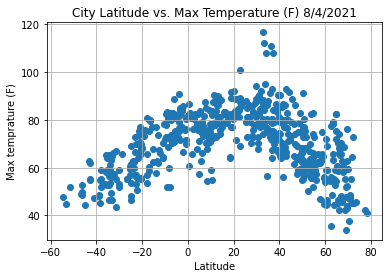

In [8]:
# Create a scatter plot showing the city latitude vs max temperature
plt.scatter(cities_pd.iloc[:,1],cities_pd.iloc[:,3])
plt.xlabel('Latitude')
plt.ylabel('Max temprature (F)')
plt.title('City Latitude vs. Max Temperature (F) 8/4/2021')
plt.grid()
plt.savefig('Figures/Latitude_MaxTemperature_Plot.png')

## Analysis of Plot lat vs Max Temp (F)
This plot shows a bell curve with higher maximum temperatures near the equator in the Northern Hemisphere.

#### Latitude vs. Humidity Plot

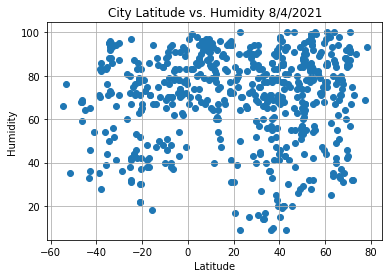

In [12]:
# Create a scatter plot showing the city latitude vs humidity
plt.scatter(cities_pd.iloc[:,1],cities_pd.iloc[:,4])
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity 8/4/2021')
plt.grid()
plt.savefig('figures/Latitude_Humidity_Plot.png')

## Analysis of plot lat vs humidity
The humidity over latitude shows higher humidity levels around the equator and more variation as you move further from the equator especially in the Northern Hemisphere.

## Latitude vs. Cloudiness Plot

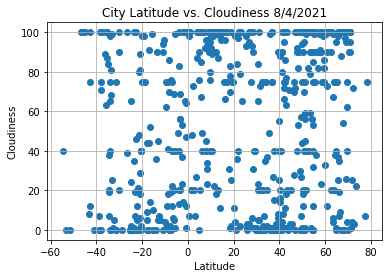

In [13]:
# Create a scatter plot showing the city latitude vs cloudiness
plt.scatter(cities_pd.iloc[:,1],cities_pd.iloc[:,5])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness 8/4/2021')
plt.grid()
plt.savefig('figures/Latitude_Cloudiness_Plot.png')

## Analysis of plot lat vs cloudiness
The distribution of cloudiness over latitude appears to be uniform with most points at 0 or 100.

## Latitude vs. Wind Speed Plot

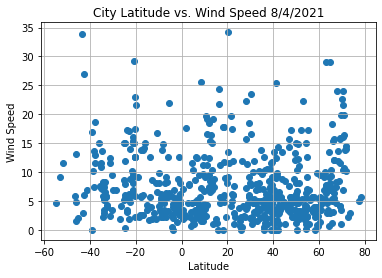

In [14]:
# Create a scatter plot showing the city latitude vs cloudiness
plt.scatter(cities_pd.iloc[:,1],cities_pd.iloc[:,6])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed 8/4/2021')
plt.grid()
plt.savefig('figures/Latitude_Wind_Speed_Plot.png')

## Analysis of plot lat vs cloudiness
There seems to be no difference in wind speed as you move away from the equator in either direction.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.5832467211127199


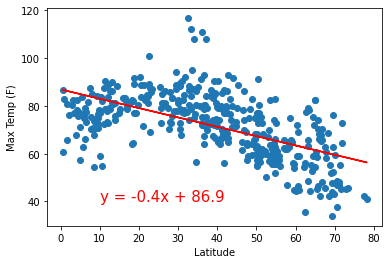

<Figure size 432x288 with 0 Axes>

In [34]:
# Create a Northern Hemisphere data frame
northern_df = cities_pd[cities_pd['Lat'] >= 0]
northern_df

# Plot a scatter plot with a linear regression and r value
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Figures/LinReg_Northern_Lat_vs_Max_Temp.png")

### Analysis of Northern Hemisphere Max Temp vs Lat
This plot shows that there is moderate correalation between max temp and latitude. As the point gets further from the equator the max temperature is likely to decrease.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7764807351786465


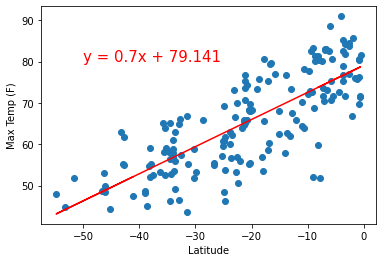

<Figure size 432x288 with 0 Axes>

In [33]:
# Create a Southern Hemisphere data frame
southern_df = cities_pd[cities_pd['Lat'] < 0]
southern_df

# Plot a scatter plot with a linear regression and r value
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,3))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Figures/LinReg_Southern_Lat_vs_Max_Temp.png")

### Analysis of Southern Hemisphere Max Temp vs Lat
There is a strong correlation that as approaching the equator the maximum temperature increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.1195503241443306


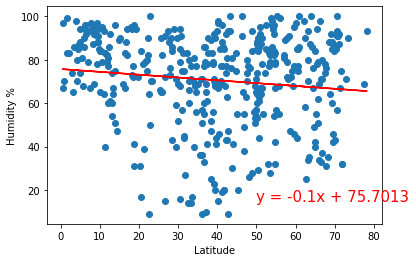

<Figure size 432x288 with 0 Axes>

In [37]:
# Plot humidity vs latitude for northern hemisphere
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Figures/LinReg_Northern_Lat_vs_Humidity.png")

### Analysis of Northern Hemisphere Humidity vs Lat
There is no or very weak correlation between latitude and humidity in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10171843836236098


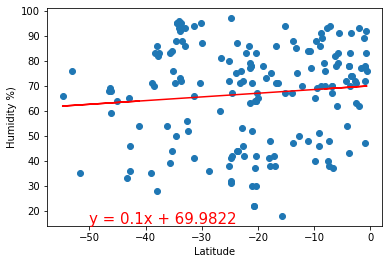

<Figure size 432x288 with 0 Axes>

In [39]:
# Plot a scatter plot with a linear regression and r value
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,4))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Figures/LinReg_Southern_Lat_vs_Humidity.png")

### Analysis of Southern Hemisphere Humidity vs Lat
There is no or very weak correlation between latitude and humidity in the Northern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.057776546291532886


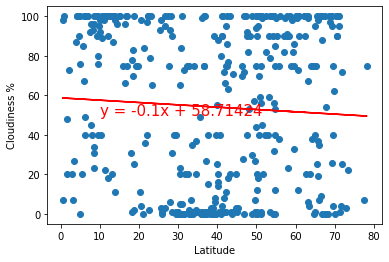

<Figure size 432x288 with 0 Axes>

In [43]:
# Plot cloudiness vs latitude for northern hemisphere
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Figures/LinReg_Northern_Lat_vs_Cloudiness.png")

### Analysis of Northern Hemisphere Cloudiness vs Lat
There is no correlation between latitude and cloudiness in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.056390310993491094


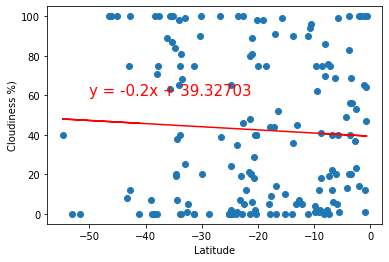

<Figure size 432x288 with 0 Axes>

In [45]:
# Plot a scatter plot with a linear regression and r value
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,5))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Figures/LinReg_Southern_Lat_vs_Cloudiness.png")

### Analysis of Southern Hemisphere Humidity vs Lat
There is no correlation between latitude and humidity in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04027723947598467


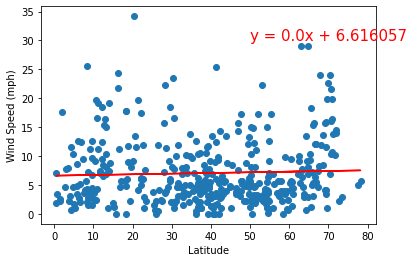

<Figure size 432x288 with 0 Axes>

In [46]:
# Plot wind speed vs latitude for northern hemisphere
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Figures/LinReg_Northern_Lat_vs_Wind_speed.png")

### Analysis of Northern Hemisphere Wind Speed vs Lat
There is no correlation between latitude and wind speed in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.22264304066709814


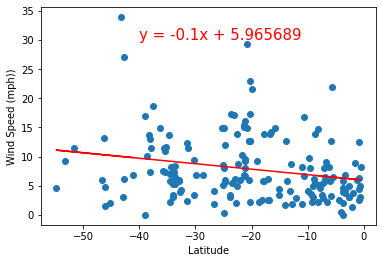

<Figure size 432x288 with 0 Axes>

In [48]:
# Plot a scatter plot with a linear regression and r value
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,1)) + "x + " + str(round(intercept,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
print(f"The r-value is: {rvalue}")
plt.show()
plt.savefig("Figures/LinReg_Southern_Lat_vs_Wind_Speed.png")

### Analysis of Southern Hemisphere Wind Speed vs Lat
There is very weak correlation between latitude and wind speed in the Southern Hemisphere.